# Predicción Precio SPOT Diario España

El proyecto consiste en realizar un modelo de ML para la predicción del **Precio SPOT Diario España**. A continuación, se realizará un análisis descriptivo de las variables, disponiendo de las siguientes fases:

- **Obtención de la base de datos**
- **Análisis y comprensión de la base de datos disponible**
- **Análisis descriptivo de las variables**


In [59]:
#Imports necesarios para el proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obtención de la base de datos

La base de datos proviene del siguiente enlace de Kaggle: [Kaggle - Spanish Electricity Market Demand, Generation, and Price](https://www.kaggle.com/datasets/manualrg/spanish-electricity-market-demand-gen-price)

Según el creador:

> Este conjunto de datos es una serie temporal diaria que incluye la demanda de electricidad, la generación y los precios en España desde 2014 hasta 2018. Los datos provienen de ESIOS, un sitio web gestionado por REE (Red Eléctrica Española), que es el operador del sistema de transmisión (TSO) en España.

> La función principal de un TSO es operar el sistema eléctrico e invertir en nueva infraestructura de transmisión de alta tensión. Más información: [REE - Actividades de negocio en electricidad en España](https://www.ree.es/es/actividades).

> Como operador del sistema, REE pronostica la demanda y oferta de electricidad y gestiona las subastas diarias. Como resultado de estas subastas, se genera un PBF (Plan Básico de Funcionamiento), que es una programación básica de la producción de energía (sobre la cual se activan diversos mecanismos para asegurar el suministro).

> Los datos de energía y precios pueden descargarse en: [ESIOS](https://www.esios.ree.es/es).

> OMIE (Operador del Mercado Ibérico de Electricidad) es responsable de llevar a cabo estas subastas diarias y también ofrece información relevante. Más detalles: [OMIE](http://www.omie.es/).

### Variables de la base de datos

- **Demanda programada PBF total (MWh)**: Demanda Total Programada
- **Demanda real (MW)**: Potencia Demandada Real
- **Energía asignada en Mercado SPOT Diario España (MWh)**: Energía Comercializada en el Mercado Spot Diario Español (OMIE)
- **Energía asignada en Mercado SPOT Diario Francia (MWh)**: Energía Comercializada en el Mercado Spot Diario Francés
- **Generación programada PBF Carbón (MWh)**: Generación Programada de Electricidad con Carbón
- **Generación programada PBF Ciclo combinado (MWh)**: Generación Programada de Electricidad en Ciclo Combinado
- **Generación programada PBF Eólica (MWh)**: Generación Programada de Electricidad con Energía Eólica
- **Generación programada PBF Gas Natural Cogeneración (MWh)**: Cogeneración Programada de Electricidad con Gas Natural
- **Generación programada PBF Nuclear (MWh)**: Generación Programada de Electricidad con Energía Nuclear
- **Generación programada PBF Solar fotovoltaica (MWh)**: Generación Programada de Electricidad con Energía Fotovoltaica
- **Generación programada PBF Turbinación bombeo (MWh)**: Generación Programada de Electricidad Reversible-Hidro
- **Generación programada PBF UGH + no UGH (MWh)**: Generación Programada Total de Electricidad con Energía Hidráulica
- **Generación programada PBF total (MWh)**: Generación Total Programada de Electricidad
- **Precio mercado SPOT Diario ESP (€/MWh)**: Precio Diario del Mercado Spot en España
- **Precio mercado SPOT Diario FRA (€/MWh)**: Precio Diario del Mercado Spot en Francia
- **Precio mercado SPOT Diario POR (€/MWh)**: Precio Diario del Mercado Spot en Portugal
- **Rentas de congestión mecanismos implícitos diario Francia exportación (€/MWh)**: Precio Diario de Exportación desde Francia
- **Rentas de congestión mecanismos implícitos diario Francia importación (€/MWh)**: Precio Diario de Importación hacia Francia
- **Rentas de congestión mecanismos implícitos diario Portugal exportación (€/MWh)**: Precio Diario de Exportación desde Portugal
- **Rentas de congestión mecanismos implícitos diario Portugal importación (€/MWh)**: Precio Diario de Importación hacia Portugal


# 2. Análisis y comprensión de la base de datos

In [60]:
#Lectura de la base de datos
df=pd.read_csv('spain_energy_market.csv')
df.head(3)

datetime   id                            name  geoid geoname  \
0  2014-01-01 23:00:00  600  Precio mercado SPOT Diario ESP    3.0  España   
1  2014-01-02 23:00:00  600  Precio mercado SPOT Diario ESP    3.0  España   
2  2014-01-03 23:00:00  600  Precio mercado SPOT Diario ESP    3.0  España   

       value  
0  25.280833  
1  39.924167  
2   4.992083

In [61]:
#Info del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  40212 non-null  object 
 1   id        40212 non-null  int64  
 2   name      34734 non-null  object 
 3   geoid     10956 non-null  float64
 4   geoname   10956 non-null  object 
 5   value     40212 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


**Los datos están estructurados de tal manera que las variables mencionadas por el autor de la base de datos están almacenadas en la columna `name`.**

**De los 40,212 valores disponibles, solo son aprovechables 34,734, dado que si la columna `name` es NaN, no se puede saber a qué variable está asignado dicho valor.**


In [62]:
#Eliminar los NaN de la columna 'name'
df = df.dropna(subset=['name'])

## Distribución de datos por días, meses y años

Rango de fechas: 2014-01-01 23:00:00 a 2018-12-31 23:00:00


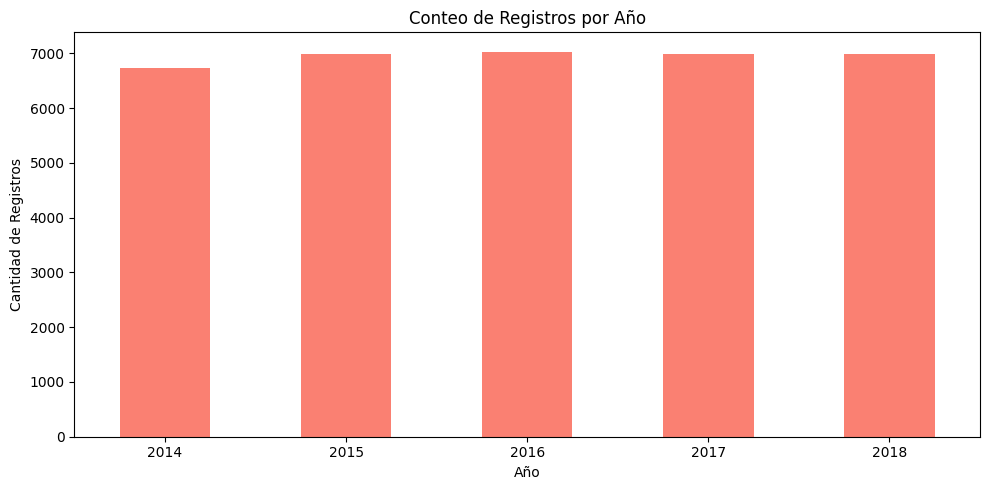

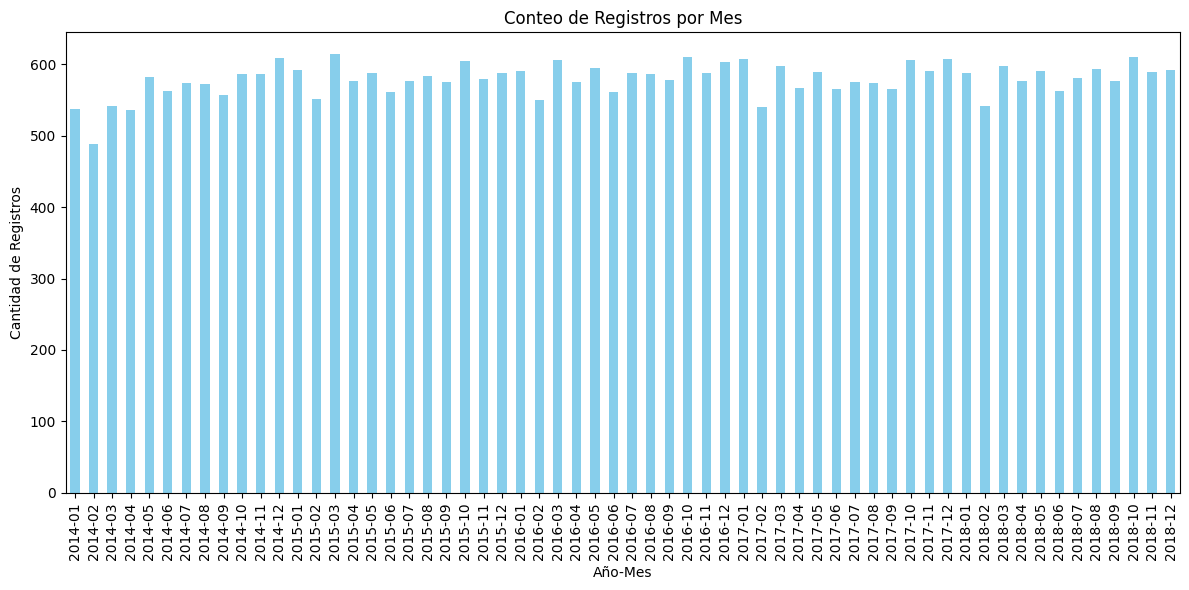

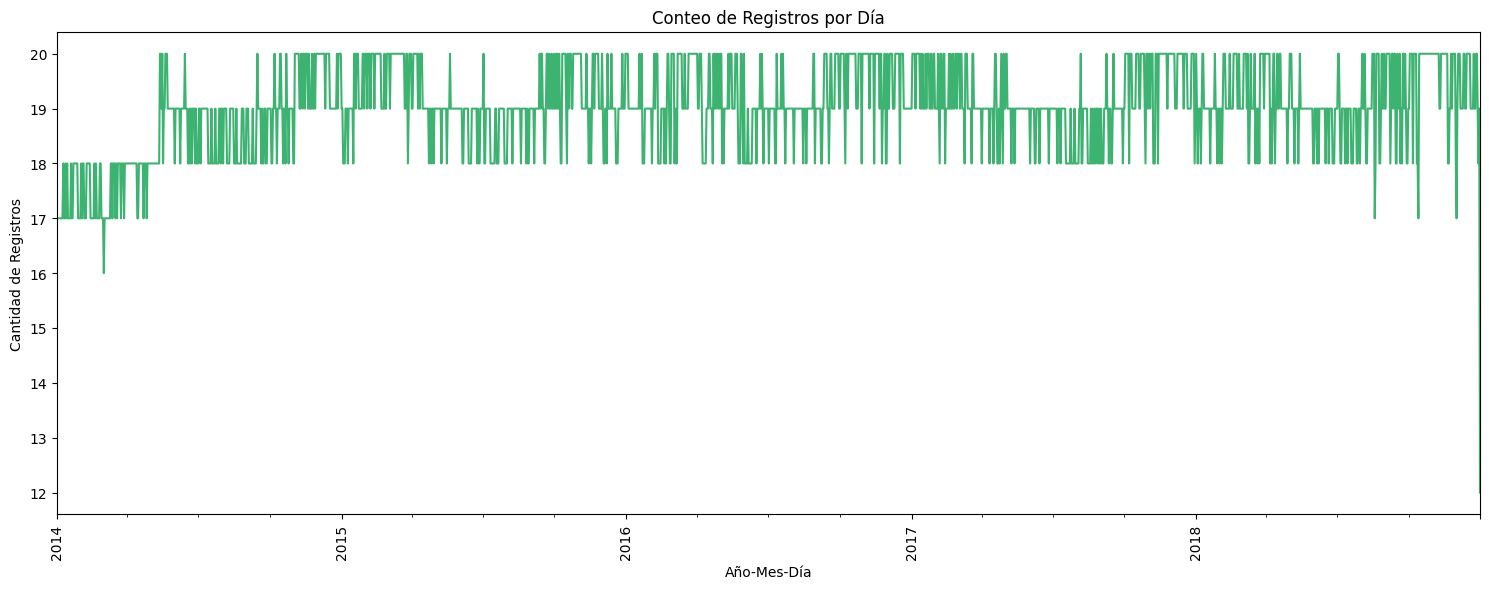

In [63]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Fecha mínima y máxima
print("Rango de fechas:", df['datetime'].min(), "a", df['datetime'].max())

df['year'] = df['datetime'].dt.to_period('Y')

# Registros por año
conteo_por_año = df['year'].value_counts().sort_index()

# Grafico registros por año
plt.figure(figsize=(10, 5))
conteo_por_año.plot(kind='bar', color='salmon')
plt.title("Conteo de Registros por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Columna para el año-mes
df['year_month'] = df['datetime'].dt.to_period('M')


# Cantidad de registros por cada combinación de año-mes
conteo_por_mes = df['year_month'].value_counts().sort_index()

# Grafica para el conteo de registros por cada combinación de año-mes
plt.figure(figsize=(12, 6))
conteo_por_mes.plot(kind='bar', color='skyblue')
plt.title("Conteo de Registros por Mes")
plt.xlabel("Año-Mes")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad
plt.tight_layout()
plt.show()

# Columna para el año-mes-día
df['year_month_day'] = df['datetime'].dt.to_period('D')

# Contar la cantidad de registros por cada día
conteo_por_dia = df['year_month_day'].value_counts().sort_index()

# Gráfico de línea para el conteo de registros por día
plt.figure(figsize=(15, 6))
conteo_por_dia.plot(kind='line', color='mediumseagreen')
plt.title("Conteo de Registros por Día")
plt.xlabel("Año-Mes-Día")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Se disponen datos desde 2014-01-01 23:00:00 a 2018-12-31 23:00:00**

**La distribución de los datos mantiene cierta uniformidad a lo largo de los meses, días y años.**

Conteo de datos por hora del día:
datetime
22    20275
23    14459
Name: count, dtype: int64


C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\551361101.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_hora.index, y=conteo_por_hora.values, palette="viridis")


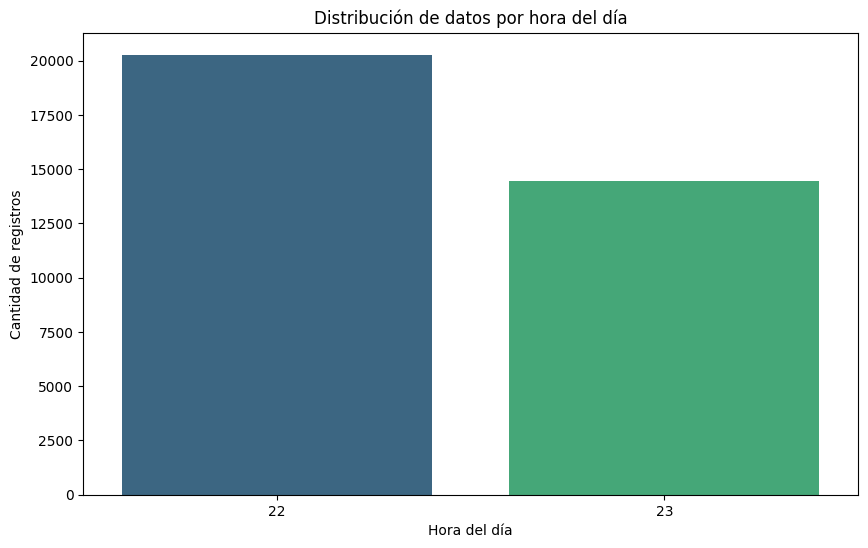

In [64]:
# Conteo de valores por hora del día
conteo_por_hora = df['datetime'].dt.hour.value_counts().sort_index()
print("Conteo de datos por hora del día:")
print(conteo_por_hora)

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_por_hora.index, y=conteo_por_hora.values, palette="viridis")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de registros")
plt.title("Distribución de datos por hora del día")
plt.show()

**Solo se disponen datos de las 22:00 y 23:00 de cada día, por lo que sería un análisis para ese momento del día.**

## Distribución de las variables 'name' a lo largo del tiempo

In [65]:
df['name'].value_counts()

name
Precio mercado SPOT Diario ESP                                            1826
Precio mercado SPOT Diario POR                                            1826
Energía asignada en Mercado SPOT Diario España                            1826
Energía asignada en Mercado SPOT Diario Francia                           1826
Generación programada PBF Solar fotovoltaica                              1826
Generación programada PBF UGH + no UGH                                    1826
Generación programada PBF Gas Natural Cogeneración                        1826
Precio mercado SPOT Diario FRA                                            1826
Generación programada PBF total                                           1825
Generación programada PBF Nuclear                                         1825
Generación programada PBF Eólica                                          1825
Demanda programada PBF total                                              1825
Demanda real                                   

**Las variables de Rentas de Congestion son a las que mayor número de nulos disponen, por lo que habra que ver el comportamiento de dichas variables y ver que realizar con ellas.**

### Recuento de las variables por año

In [66]:
# Número de registros de la columna 'name'
conteo_name_año=df.groupby('year')['name'].value_counts()

# Los años de los que se dispone registro
name_año = conteo_name_año.index.get_level_values(0).unique()

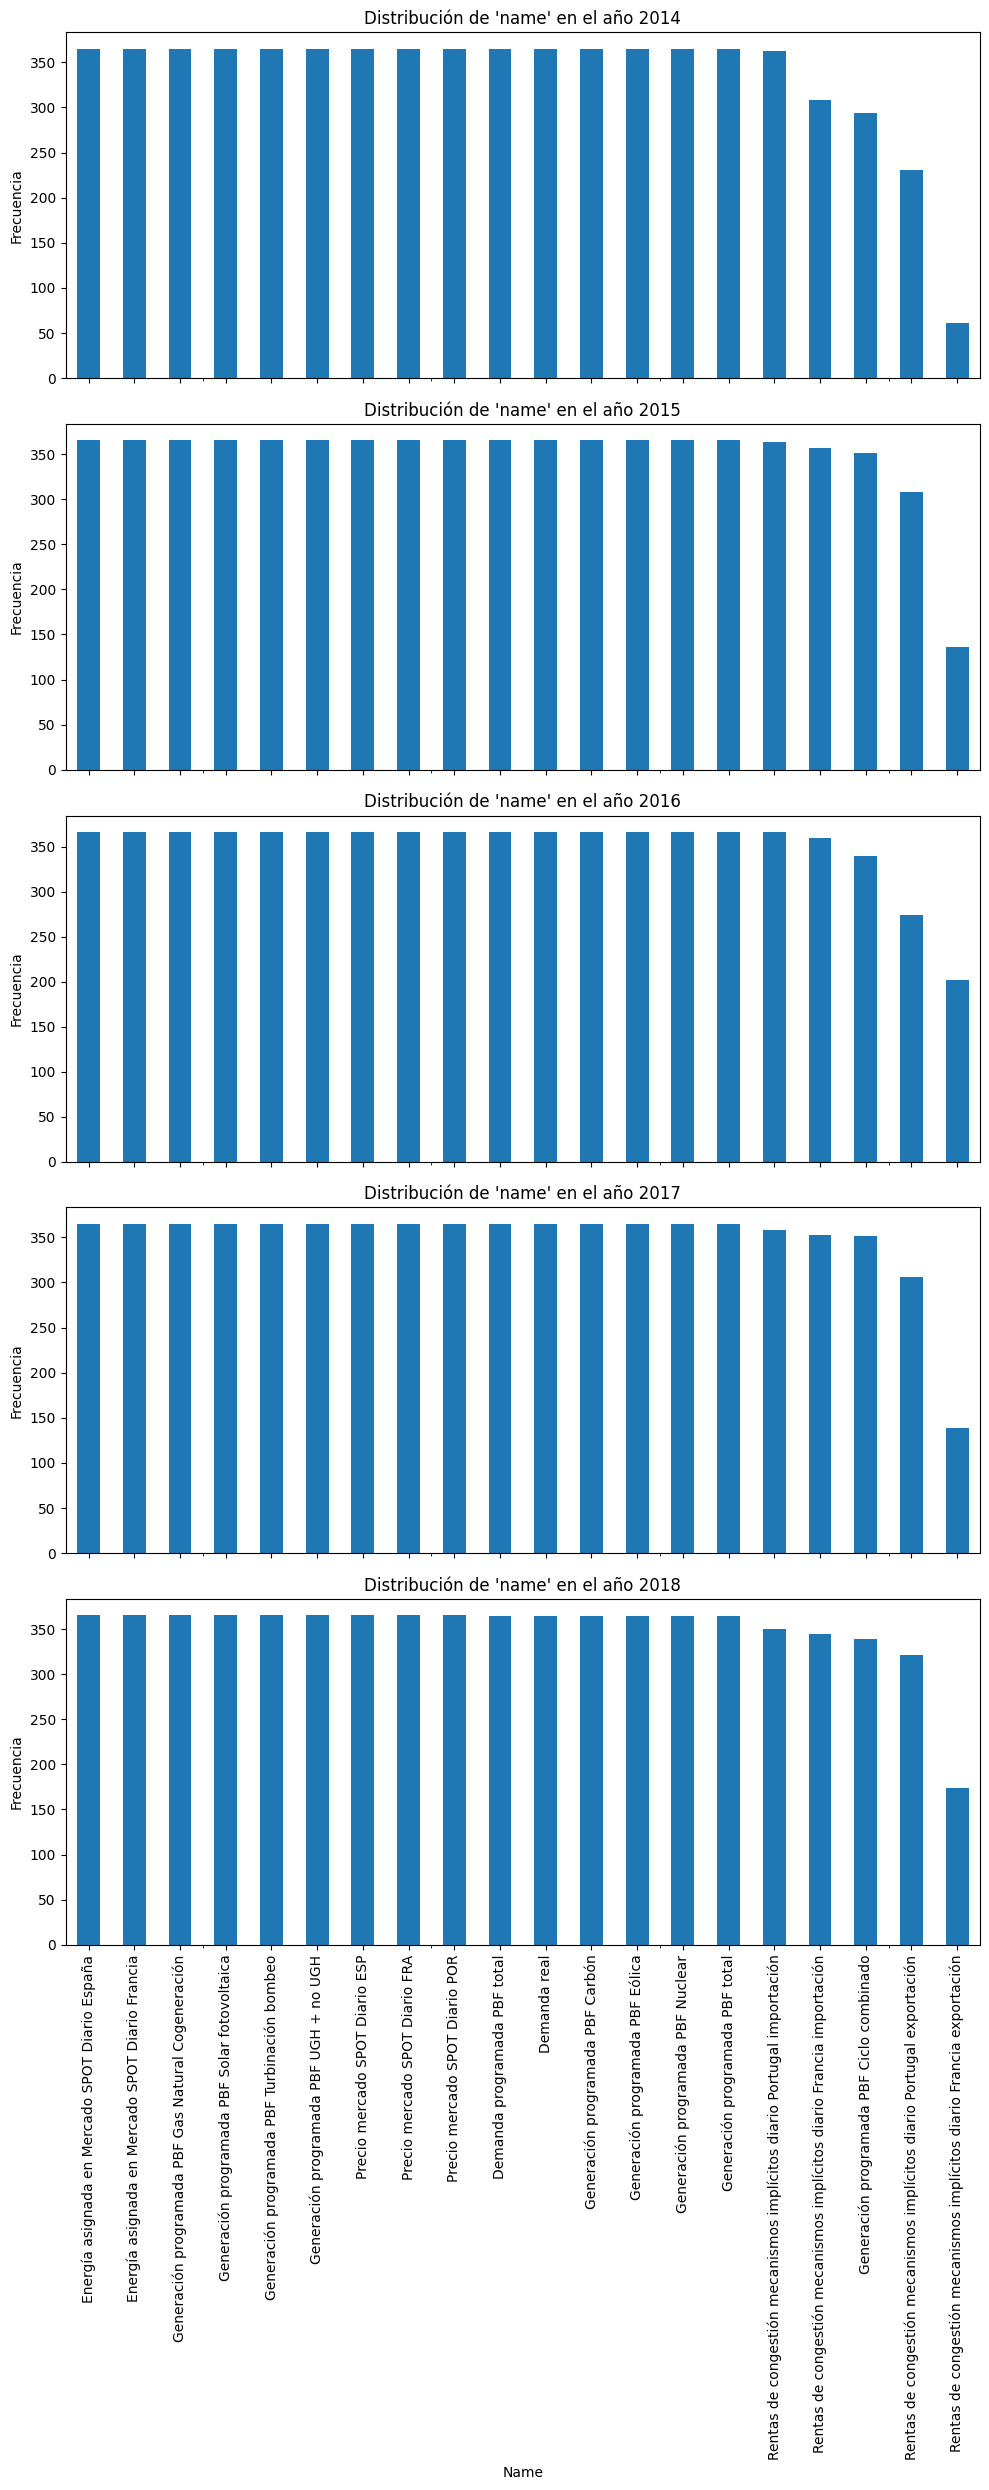

In [67]:
fig, axes = plt.subplots(len(name_año), 1, figsize=(10, 5 * len(name_año)), sharex=True)

# Si hay un solo año
if len(name_año) == 1:
    axes = [axes]


for i, año in enumerate(name_año):
    
    conteo_por_año = conteo_name_año.loc[año]

    
    conteo_por_año.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Distribución de 'name' en el año {año}")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x')


plt.xlabel("Name")
plt.tight_layout()
plt.show()

La cantidad de datos de cada variable está distribuida de manera uniforme a lo largo de los años. Sin embargo, como ya se había observado, las variables de Rentas de Congestión son las que tienen menos datos disponibles. En particular, la variable **"Rentas de congestión mecanismos implícitos diario Francia exportación"** es la que cuenta con menos datos. Esto hace necesario comprender el comportamiento de esta variable para decidir cómo tratar sus valores nulos de manera adecuada.


# 3. Análisis descriptivo de las variables

## Conversión del dataframe para disponer de una columna para cada variable de la columna `name`

In [68]:
unique_names = df['name'].unique()


dataframes = {}


for name in unique_names:
    
    if not pd.isna(name):   
        safe_name = str(name).replace(" ", "_").replace("+", "plus").replace("/", "_")
        
    df_filtered = df[df['name'] == name]

    #print(df_filtered.head(3))
    
    dataframes[safe_name] = df_filtered

In [74]:
def juntar_df(dataframes):
    
    x=0
    for name, df in dataframes.items():
        df[name]=df['value']
        #print(df.head(3))
        df = df.drop(columns=['id','value','name','geoid','geoname','year_month','year','year_month_day'])
        #if name=='Energía_asignada_en_Mercado_SPOT_Diario_Francia':
            #print(df.head())
        if x==0:
            df_=df
            x=1
        else:
            df_=pd.merge(df_, df, on='datetime', how='outer')
    return df_

df_juntado=juntar_df(dataframes)
df_juntado['Demanda_real_MWh']=df_juntado['Demanda_real']*24
df_juntado['día_semana'] = df_juntado['datetime'].dt.dayofweek
df_juntado['día_año'] = df_juntado['datetime'].dt.dayofyear
df_juntado['semana_año'] = df_juntado['datetime'].dt.isocalendar().week
df_juntado['mes'] = df_juntado['datetime'].dt.month
df_juntado['trimestre'] = df_juntado['datetime'].dt.quarter
df_juntado['year_month'] = df_juntado['datetime'].dt.to_period('M')
df_juntado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 28 columns):
 #   Column                                                                  Non-Null Count  Dtype         
---  ------                                                                  --------------  -----         
 0   datetime                                                                1826 non-null   datetime64[ns]
 1   Precio_mercado_SPOT_Diario_ESP                                          1826 non-null   float64       
 2   Precio_mercado_SPOT_Diario_FRA                                          1826 non-null   float64       
 3   Precio_mercado_SPOT_Diario_POR                                          1826 non-null   float64       
 4   Energía_asignada_en_Mercado_SPOT_Diario_España                          1826 non-null   float64       
 5   Energía_asignada_en_Mercado_SPOT_Diario_Francia                         1826 non-null   float64       
 6   Rentas_de_congestión_mec

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\816470557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name]=df['value']
C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\816470557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name]=df['value']
C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\816470557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

## Matriz de Correlación entre las variables

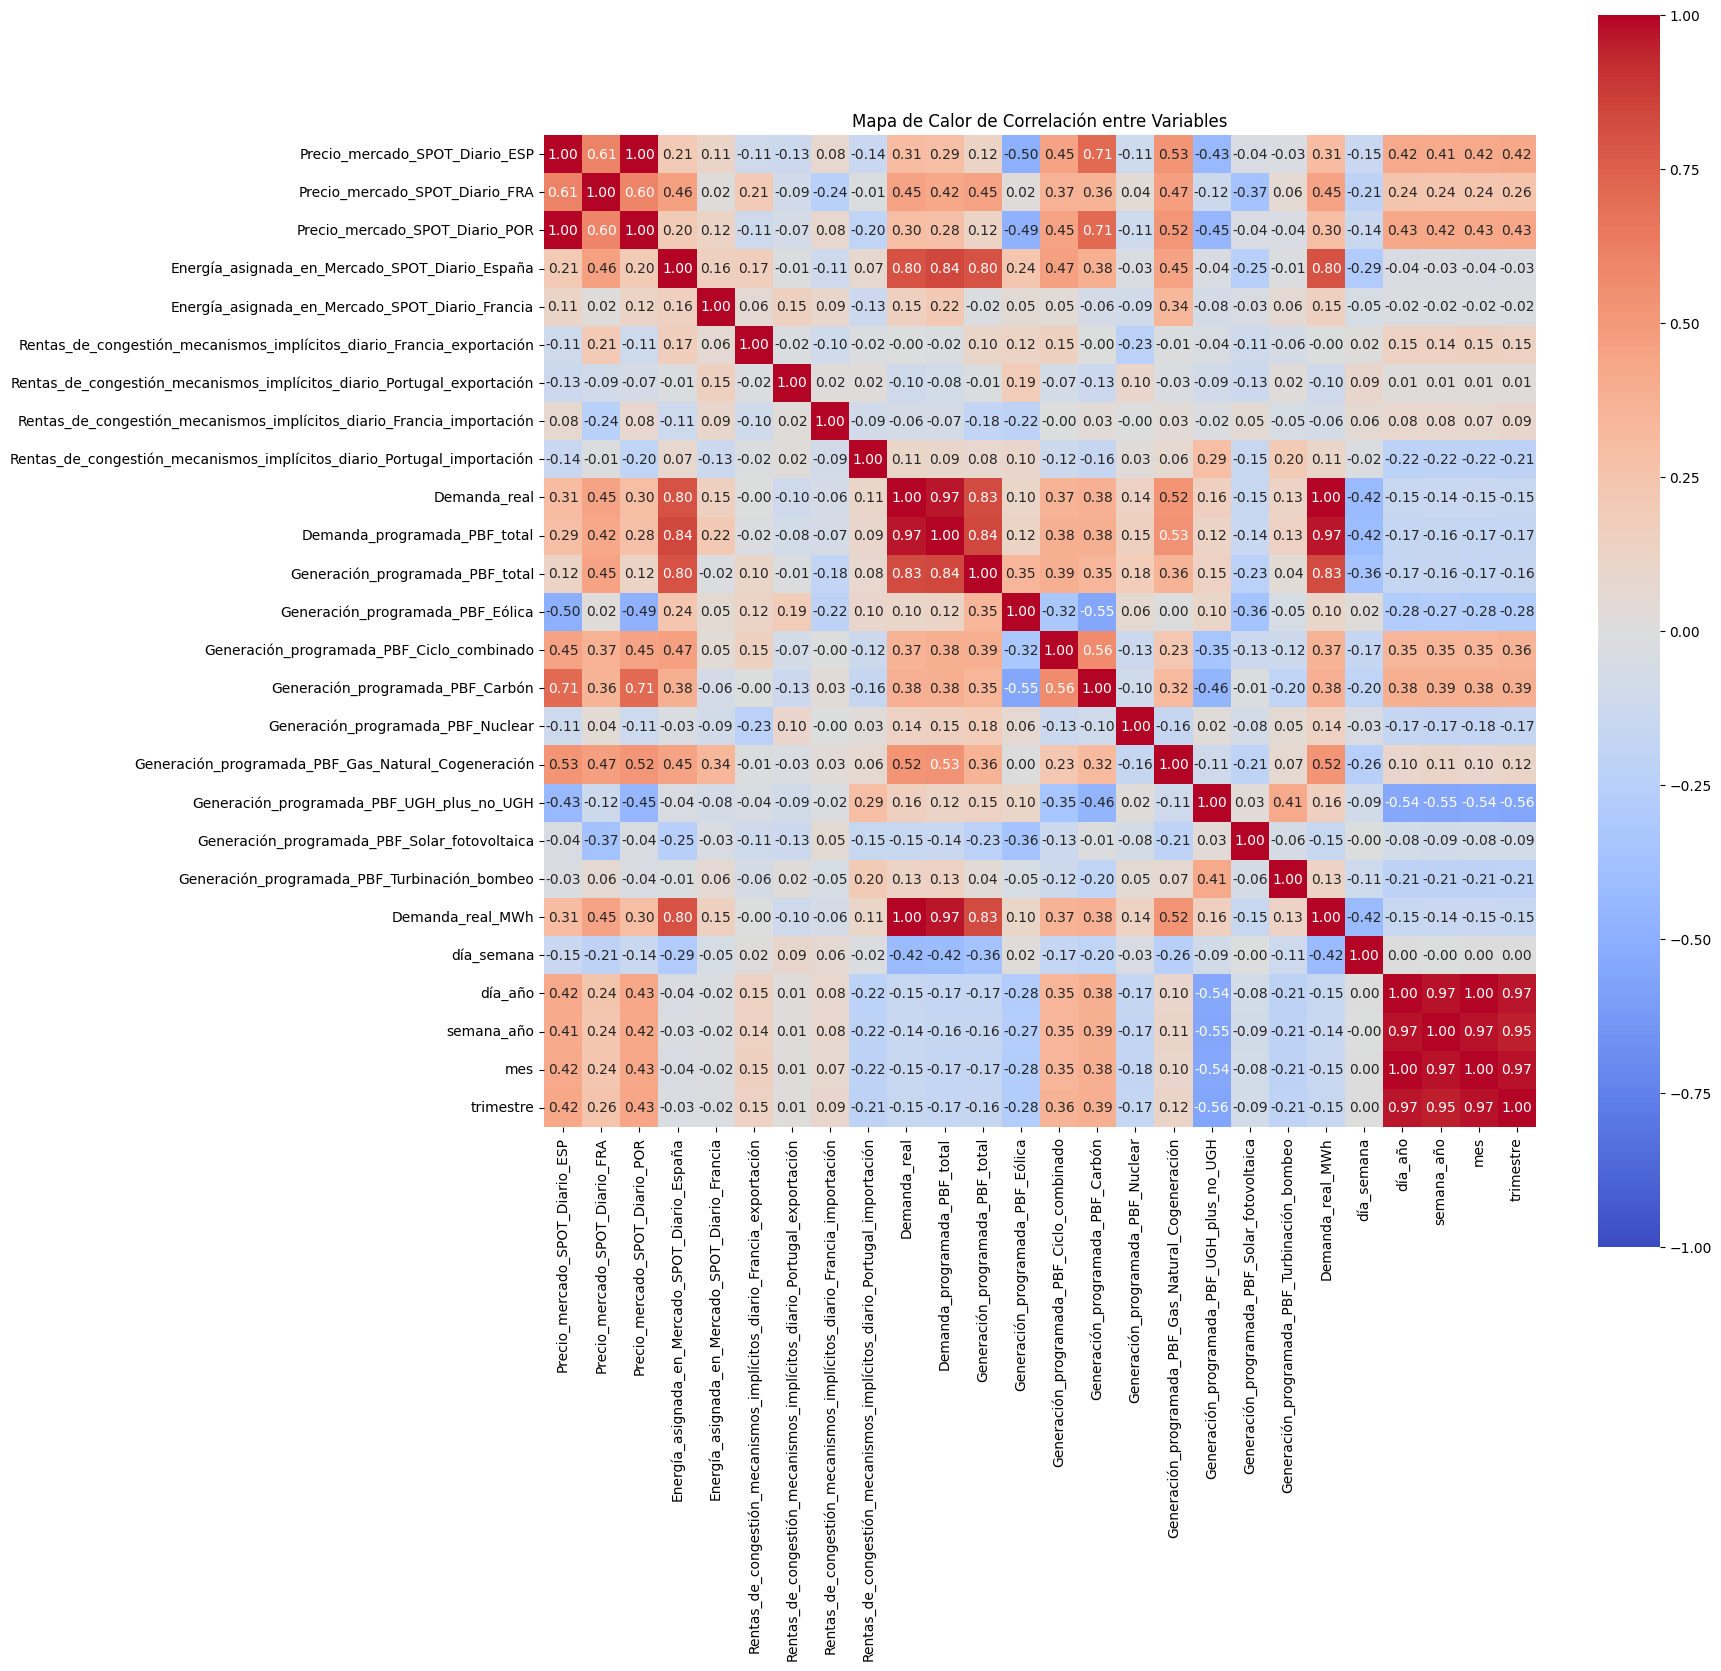

In [75]:
#df sin 'datetime'
df_juntado_sd=df_juntado.drop(columns=['datetime','year_month'])

correlation_matrix = df_juntado_sd.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, mask=correlation_matrix.isnull())
plt.title(f"Mapa de Calor de Correlación entre Variables")
plt.show()

### Correlaciones observadas:

- **Precios de Mercado SPOT diarios de los 3 paises**
- **La influencia de cada tipo de energía en su Generación Programada PBF y la Demanda Programada PBF**
- **Influencia de los tipos de energía en el Precio de Mercado SPOT Diario**
- **Correlación entre la demanda y la energía asiganada**

## Matriz de Correlación entre las variables mes y día de la semana

**Añadiendo las variables de día de la semana y el mes del que se dispone dato, se realizá a continuación una matriz de correlaciones entre dichas variables y las de Precio, Energía asignada y Demanda.**

**En el caso de que el día de la semana sea sabado por ejemplo, dispone de cierta correlación negativa con la demanada. El resto de variables de mes y día de la semana tienen una correlación baja pero no nula. Por lo que más adelante se analizará si se ve algun patron entre ellas y la demanda o el precio.**

### Correlaciones observadas:

- **Día de la semana/mes y Precio SPOT**
- **Día de la semana/mes y Demanda**
- **Día de la semana/mes y Energía asignada**

**Se analizarán dentro de los apartados generados para las correlaciones principales.**

#### Precios de Mercado SPOT diarios de los 3 paises

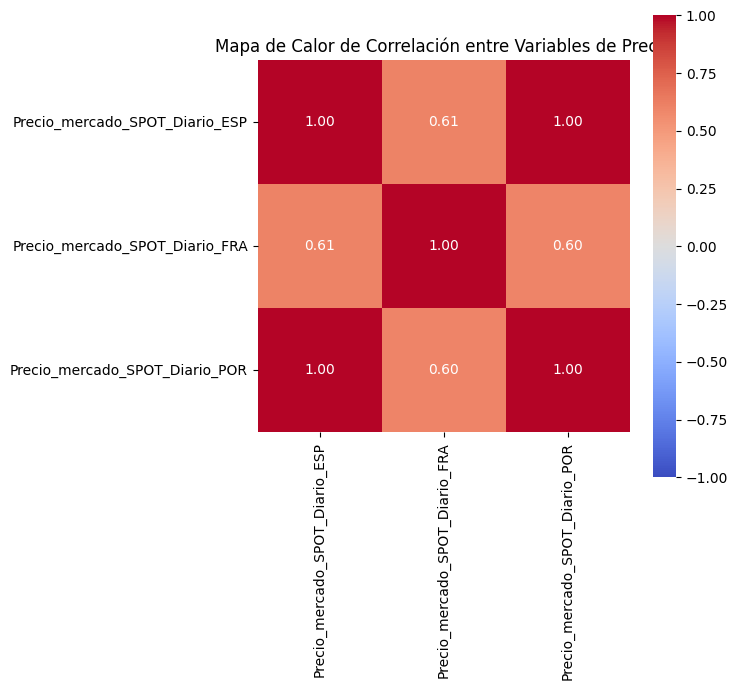

In [77]:
# df precio
precio_columns = [col for col in df_juntado_sd.columns if 'Precio' in col]  
df_precios = df_juntado_sd[precio_columns]

correlation_matrix = df_precios.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, mask=correlation_matrix.isnull())
plt.title("Mapa de Calor de Correlación entre Variables de Precio")
plt.show()

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\586387333.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name', y='value', data=df_combined, palette='Set3')


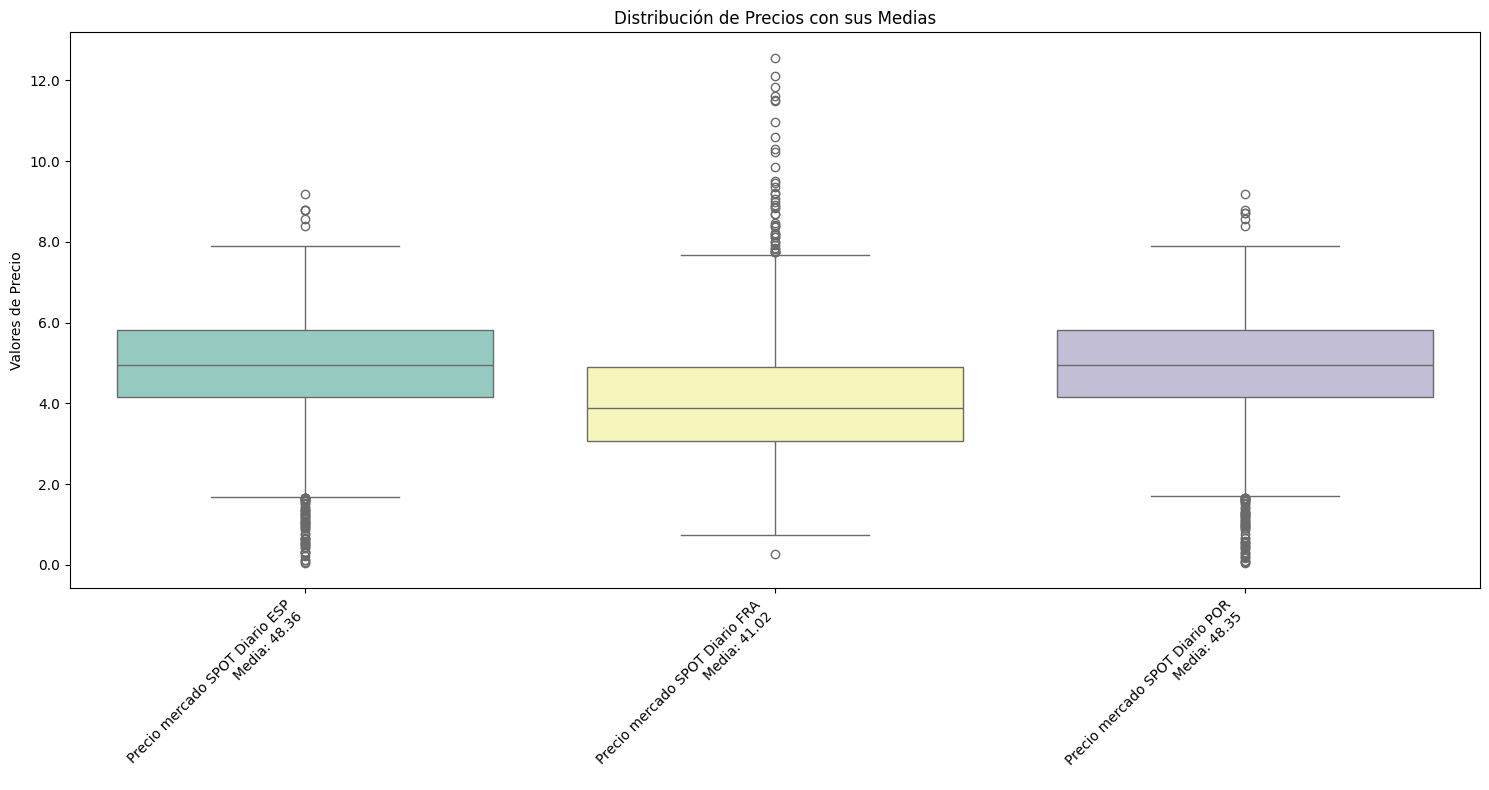

In [78]:
# Filtrar los datos para las variables que empiezan por "Precio"
variables = [variable for variable in df['name'].unique() if variable.startswith("Precio")]
df_combined = df[df['name'].isin(variables)]

# Calcular la media de cada variable para añadirla a las etiquetas
medias = df_combined.groupby('name')['value'].mean().to_dict()

# Crear el boxplot con todas las variables en un solo gráfico
plt.figure(figsize=(15, 8))
sns.boxplot(x='name', y='value', data=df_combined, palette='Set3')

# Añadir la media a las etiquetas del eje x
plt.xticks(ticks=range(len(medias)), 
           labels=[f"{name}\nMedia: {media:.2f}" for name, media in medias.items()], rotation=45, ha='right')

# Ajustar el eje y a la escala deseada
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x / 1e1:.1f}"))

# Títulos y etiquetas
plt.title("Distribución de Precios con sus Medias")
plt.ylabel("Valores de Precio")
plt.xlabel("")

plt.tight_layout()  # Ajuste de layout
plt.show()

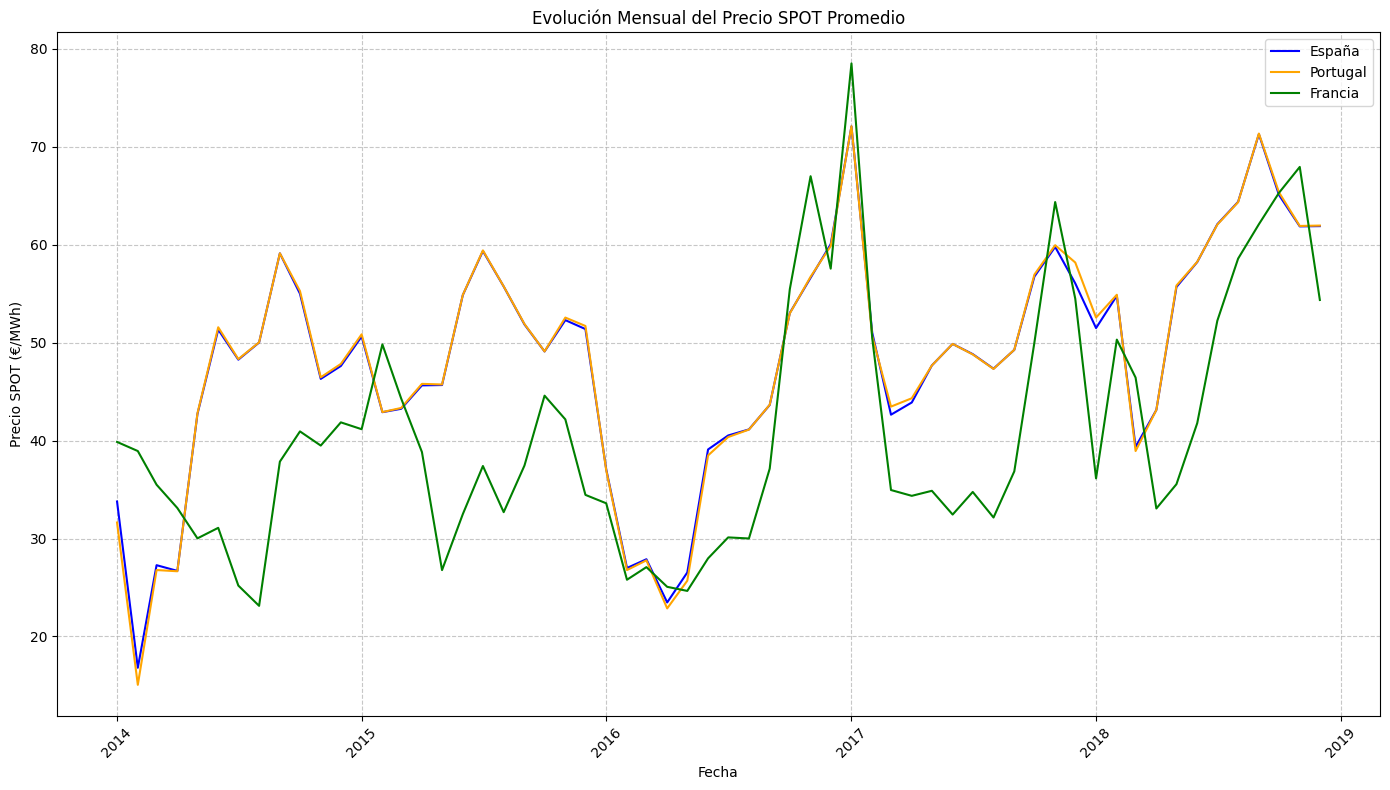

In [79]:
df_juntado['year_month'] = df_juntado['datetime'].dt.to_period('M')

# Media mensual de los precios
df_precio_mensual = df_juntado.groupby('year_month')[['Precio_mercado_SPOT_Diario_ESP', 'Precio_mercado_SPOT_Diario_POR', 'Precio_mercado_SPOT_Diario_FRA']].mean().reset_index()
df_precio_mensual['year_month'] = df_precio_mensual['year_month'].dt.to_timestamp()


plt.figure(figsize=(14, 8))

plt.plot(df_precio_mensual['year_month'], df_precio_mensual['Precio_mercado_SPOT_Diario_ESP'], label='España', color='blue')
plt.plot(df_precio_mensual['year_month'], df_precio_mensual['Precio_mercado_SPOT_Diario_POR'], label='Portugal', color='orange')
plt.plot(df_precio_mensual['year_month'], df_precio_mensual['Precio_mercado_SPOT_Diario_FRA'], label='Francia', color='green')

plt.title("Evolución Mensual del Precio SPOT Promedio")
plt.xlabel("Fecha")
plt.ylabel("Precio SPOT (€/MWh)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Como se observaba en la matriz de correlación, el `Precio SPOT de mercado`de España son practicamente iguales. Esto se debe a que ambos paises forman parte del Mercado Ibérico de la Electricidad **MIBEL**. MIBEL es un mercado eléctrico integrado, y opera bajo un sistema unificado de fijación de precios. Cuando hay capacidad suficiente para el intercambio de energía a través de estas interconexiones, el precio se iguala, reflejando las condiciones de oferta y demanda en el mercado conjunto.

El precio de Francia es consistentemente menor, aunque sigue tambíen las tendencias de los precios de España y Portugal. Esto se debe a su interconexión a traves de la red eléctrica europea y a factores de mercado comunes, como:

- **Factores Climáticos y de Producción**: Dado que son paises vecinos, las condiciones climatológicas comparten patrones de similitud.
- **Precio de los Combustibles y Costes de Producción**: Se dispone de similar dependencia de ellos, por lo que las fluctuaciones en sus precios afectan de manera similar.
- **Importación y Exportación de Energía**: España puede importar electricidad de Francia cuando los precios son más bajos.
    

#### Precio SPOT de mercado diario España por estaciones y días de la semana

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\3859222324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_juntado, x="día_semana", y="Precio_mercado_SPOT_Diario_ESP",palette='Set2')


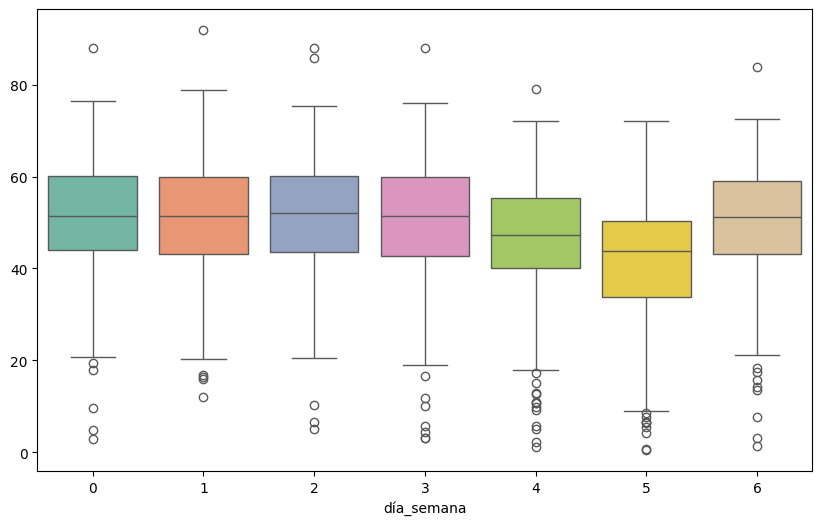

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_juntado, x="día_semana", y="Precio_mercado_SPOT_Diario_ESP",palette='Set2')
plt.title("")
plt.ylabel("")
plt.show()

**El sábado tiene tendencia de ser más bajo el precio SPOT, seguido del viernes. Aunque no se ve que disponga de tanta influencia en el precio.**

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\1066473344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_juntado, x="mes", y="Precio_mercado_SPOT_Diario_ESP",palette='Set2')


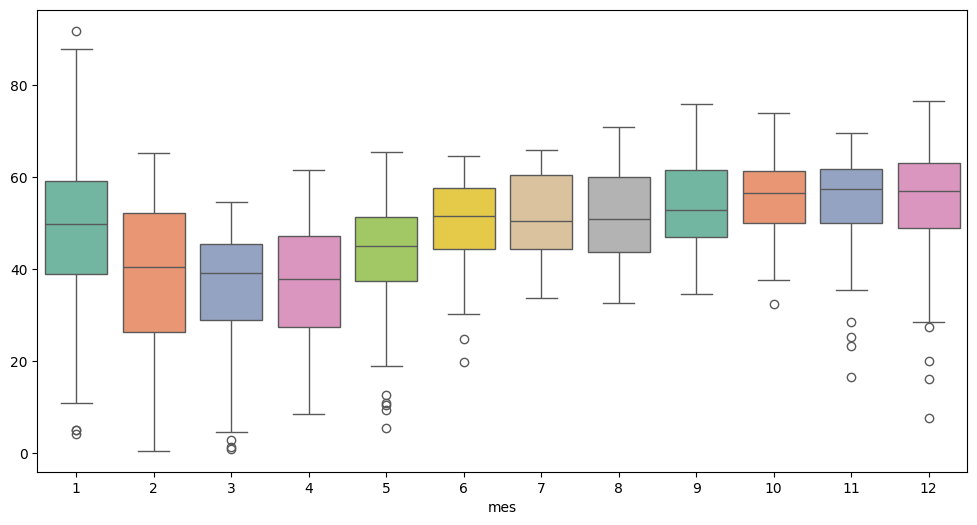

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_juntado, x="mes", y="Precio_mercado_SPOT_Diario_ESP",palette='Set2')
plt.title("")
plt.ylabel("")
plt.show()

**En cuanto al mes, en primavera se ve una tendencia de menor precio SPOT. Aunque no se ve que disponga de tanta influencia en el precio.**

### La influencia de cada tipo de energía en su Generación Programada PBF y la Demanda Programada PBF

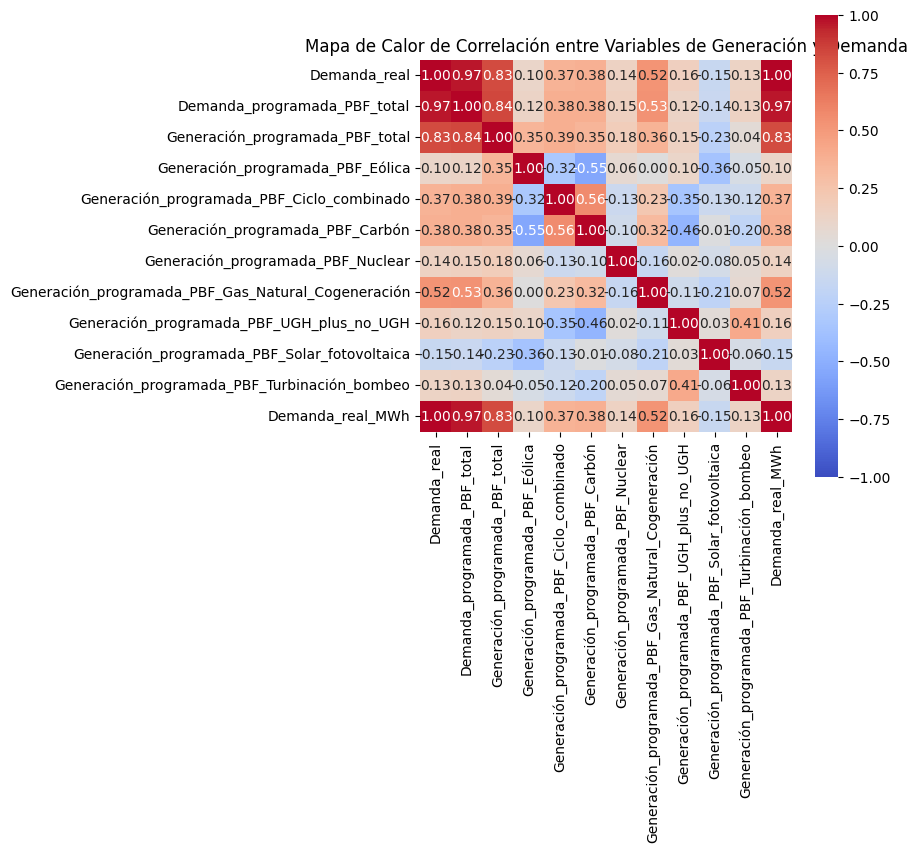

In [41]:
# df precio y tipos de energía
precio_columns = [col for col in df_juntado_sd.columns if 'Generación' in col or 'Demanda' in col ]  
df_precios = df_juntado_sd[precio_columns]

correlation_matrix = df_precios.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, mask=correlation_matrix.isnull())
plt.title("Mapa de Calor de Correlación entre Variables de Generación y Demanda")
plt.show()

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\2290532987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generacion['year_quarter'] = df_generacion['datetime'].dt.to_period('Q')


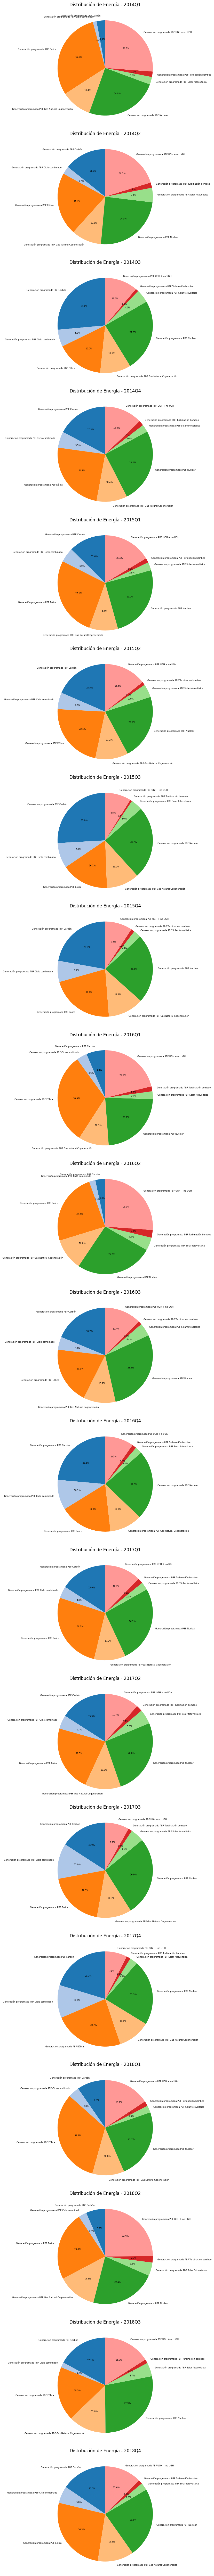

In [42]:
generacion_variables = [variable for variable in df['name'].unique() if variable.startswith("Generación") and variable != "Generación programada PBF total"]

df_generacion = df[df['name'].isin(generacion_variables)]

# Columna para el año-trimestre
df_generacion['year_quarter'] = df_generacion['datetime'].dt.to_period('Q')

# Media por trimestre para cada tipo de generación
df_generacion_grouped = df_generacion.groupby(['year_quarter', 'name'])['value'].mean().unstack(fill_value=0)

num_trimestres = df_generacion_grouped.index.nunique()
fig, axs = plt.subplots(num_trimestres, 1, figsize=(15, num_trimestres*5), subplot_kw=dict(aspect="equal"))

for i, trimestre in enumerate(df_generacion_grouped.index):
    # Datos para el gráfico de pastel
    data = df_generacion_grouped.loc[trimestre]
    

    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors,textprops={'fontsize':6})
    axs[i].set_title(f"Distribución de Energía - {trimestre}")

plt.tight_layout()
plt.show()

**En la matriz de correlación se observa que la Generación programada PBF Eólica y la UGH disponen de cierta correlación negativa con la Generación programa PBF Carbón. En los gráficos de área, se muestra como cuando la energía eólica e hidroeléctrica son más bajas, es cuando se aumenta la generación de carbón.**

**A continuación, se mostrará la generación de cada tipo de energia a lo largo del tiempo, separandolas en las que más y menos energía generan**

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\3686702212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generacion_especificas['year_month'] = df_generacion_especificas['datetime'].dt.to_period('M')


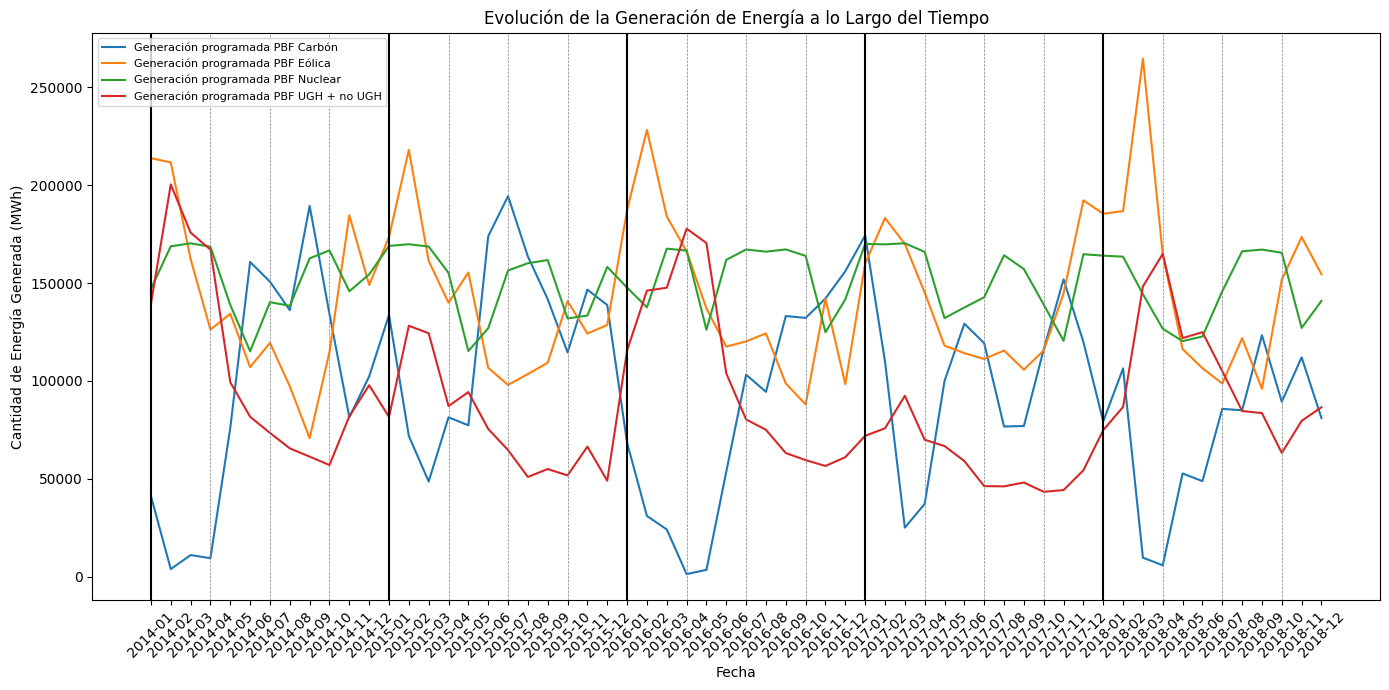

In [43]:
generacion_especificas = ["Generación programada PBF Carbón", 
                           "Generación programada PBF Eólica", 
                           "Generación programada PBF Nuclear",
                           "Generación programada PBF UGH + no UGH"]

df_generacion_especificas = df[df['name'].isin(generacion_especificas)]

df_generacion_especificas['year_month'] = df_generacion_especificas['datetime'].dt.to_period('M')

# Media por mes para cada tipo de generación
df_generacion_grouped = df_generacion_especificas.groupby(['year_month', 'name'])['value'].mean().unstack(fill_value=0)


plt.figure(figsize=(14, 7))

for variable in df_generacion_grouped.columns:
    plt.plot(df_generacion_grouped.index.astype(str), df_generacion_grouped[variable], label=variable)

# Líneas verticales para marcar cada trimestre
for i in range(len(df_generacion_grouped.index)):
    if i % 3 == 0:  # Cada tercer mes 
        plt.axvline(x=df_generacion_grouped.index[i].strftime('%Y-%m'), color='gray', linestyle='--', linewidth=0.5)

# Líneas verticales más gruesas para marcar el inicio de cada año
for i in range(len(df_generacion_grouped.index)):
    if df_generacion_grouped.index[i].month == 1:  # Enero
        plt.axvline(x=df_generacion_grouped.index[i].strftime('%Y-%m'), color='black', linestyle='-', linewidth=1.5)

plt.title("Evolución de la Generación de Energía a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Energía Generada (MWh)")
plt.xticks(rotation=45)  
plt.legend(prop={'size': 8}) 

plt.tight_layout()
plt.show()

- **La energía nuclear es estable a lo largo del tiempo. Se conoce que se suelen realizar paradas programadas para mantenimiento es las épocas de menor demanda, normalmente en otoño y primavera.**
- **Las energías hidroeléctrica y eólica no son estables a lo largo del tiempo. Suelen ir acordes a las tendencias de vienta y lluvias, aunque a día de hoy pueden ser cambiantes de año a año.**
- **La generación de carbon se ve que es inversa a la generación de eóliga y UGH, se podría considerar una energía compensatoria.**


C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\4293436727.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generacion_especificas['year_month'] = df_generacion_especificas['datetime'].dt.to_period('M')


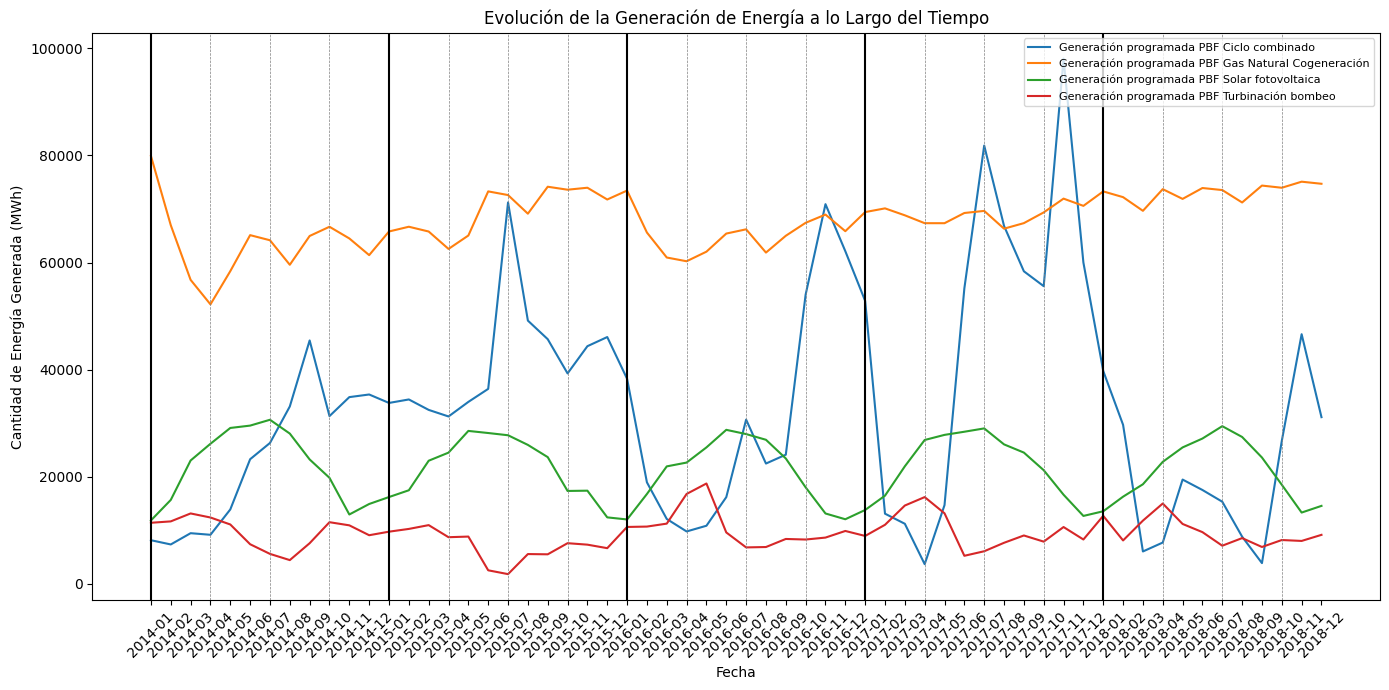

In [44]:
generacion_especificas = ["Generación programada PBF Solar fotovoltaica", 
                           "Generación programada PBF Turbinación bombeo", 
                           "Generación programada PBF Ciclo combinado",
                           "Generación programada PBF Gas Natural Cogeneración"]

df_generacion_especificas = df[df['name'].isin(generacion_especificas)]

df_generacion_especificas['year_month'] = df_generacion_especificas['datetime'].dt.to_period('M')

df_generacion_grouped = df_generacion_especificas.groupby(['year_month', 'name'])['value'].mean().unstack(fill_value=0)

plt.figure(figsize=(14, 7))

for variable in df_generacion_grouped.columns:
    plt.plot(df_generacion_grouped.index.astype(str), df_generacion_grouped[variable], label=variable)

for i in range(len(df_generacion_grouped.index)):
    if i % 3 == 0: 
        plt.axvline(x=df_generacion_grouped.index[i].strftime('%Y-%m'), color='gray', linestyle='--', linewidth=0.5)

for i in range(len(df_generacion_grouped.index)):
    if df_generacion_grouped.index[i].month == 1:  
        plt.axvline(x=df_generacion_grouped.index[i].strftime('%Y-%m'), color='black', linestyle='-', linewidth=1.5)

plt.title("Evolución de la Generación de Energía a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Energía Generada (MWh)")
plt.xticks(rotation=45)  
plt.legend(prop={'size': 8}) 

plt.tight_layout()
plt.show()

- **Tanto la generación por Gas Natural de Cogeneración y la Turbinación de Bombeo son estables a lo largo del tiempo.**
- **En cuanto a la generación fotovoltaica, se puede observar cuales son los meses de mayor sol.**
- **La generación por ciclo combinado dispone de cierta correlación con la demanda del momento. Es decir, en los momento de mayor demanda que no se puede hacer frente a ella con las energías renovables y nuclear, se suelen utilizar energías como la de ciclo combinado o el carbón.**

### Influencia de los tipos de energía en el Precio de Mercado SPOT Diario

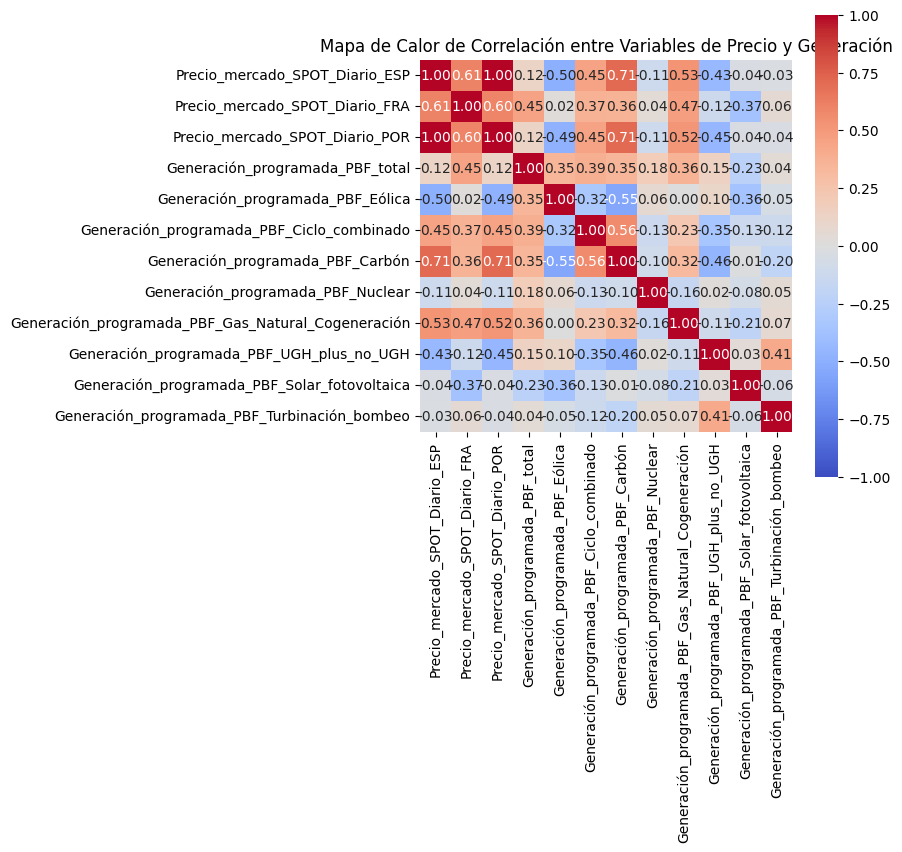

In [45]:
precio_columns = [col for col in df_juntado_sd.columns if 'Generación' in col or 'Precio' in col ]  
df_precios = df_juntado_sd[precio_columns]

correlation_matrix = df_precios.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, mask=correlation_matrix.isnull())
plt.title("Mapa de Calor de Correlación entre Variables de Precio y Generación")
plt.show()

**La influencia de los tipos de ernegías en el precio SPOT es de la siguiente manera:**

- **Las Energías que mayor aumento generan en el precio son el Carbón, el Gas Natural de Cogeneración y el Ciclo Combinado. Esto se debe a que se hace uso de ellas cuando no se dispone de otras energías más baratas para hacer frente a su demanda y su alto coste de generación.**
- **Las energías de menor coste son las renovables (Eólica, Hidroeléctrica y Fotovoltaica). La fotovoltaica no tiene tanta correlación debido que la energía que genera es baja y con menores fluctuaciones en cortos periodos de tiempo. Es decir, cuando la eólica e hidroeléctrica no tienen suficiente capacidad para hacer frente a la demanda se hace uso de otro tipo de energías de mayor coste.**

### Correlación entre la demanda y la energía asiganada

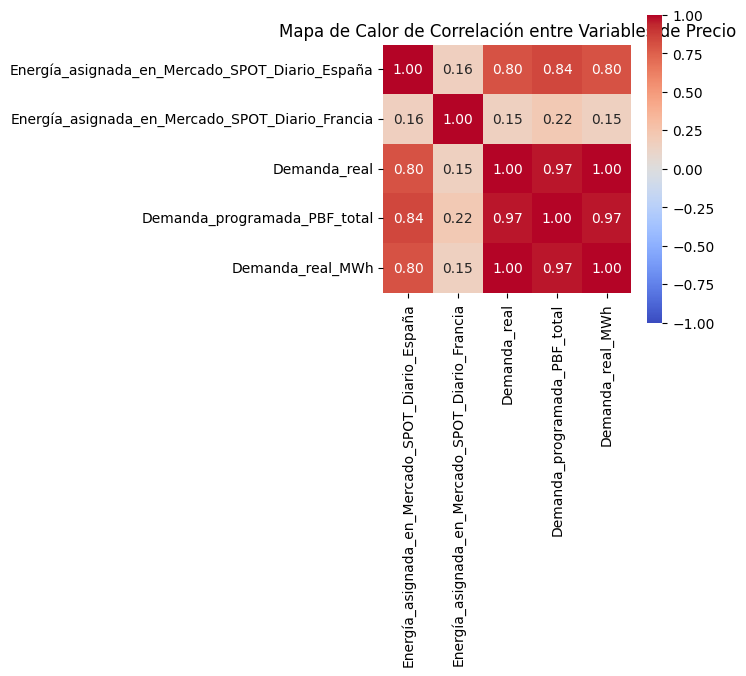

In [46]:
precio_columns = [col for col in df_juntado_sd.columns if 'Demanda' in col or 'Energía' in col ]  
df_precios = df_juntado_sd[precio_columns]

correlation_matrix = df_precios.corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, mask=correlation_matrix.isnull())
plt.title("Mapa de Calor de Correlación entre Variables de Precio")
plt.show()

**No se pueden extraer conclusiones más lejanas a que cuanto mayor es la demanda, mayor es la energía asignada en España.**

### Análisis descriptivo del resto de variables

#### Energía asignada

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\2275405762.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='energia', data=df_boxplot_energia,palette='Set3')


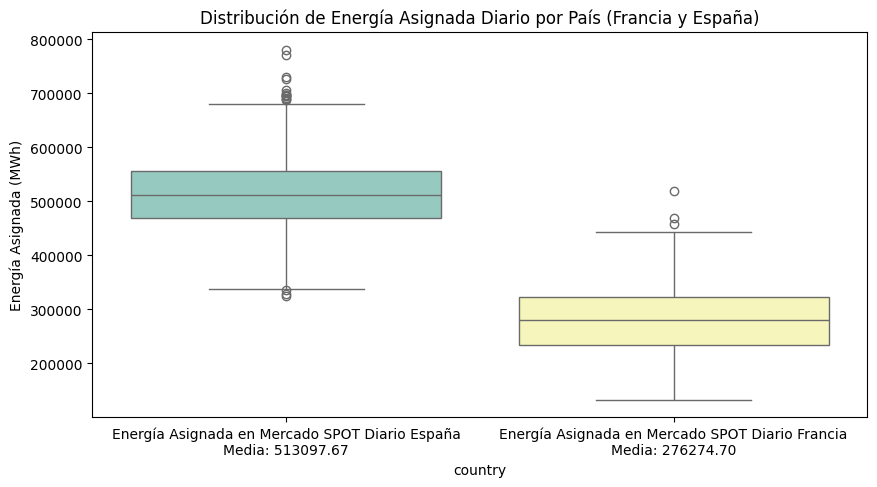

In [47]:
df_energia_espana = df[df['name'] == "Energía asignada en Mercado SPOT Diario España"]
df_energia_francia = df[df['name'] == "Energía asignada en Mercado SPOT Diario Francia"]


df_merged_energia = df_energia_espana[['datetime', 'value']].merge(
    df_energia_francia[['datetime', 'value']], on='datetime', suffixes=('_espana', '_francia'))


df_merged_energia.columns = ['datetime', 'energia_espana', 'energia_francia']

df_boxplot_energia = pd.melt(df_merged_energia, id_vars=['datetime'], 
                              value_vars=['energia_espana', 'energia_francia'],
                              var_name='country', value_name='energia')

media_espana = df_boxplot_energia[df_boxplot_energia['country'] == 'energia_espana']['energia'].mean()
media_francia = df_boxplot_energia[df_boxplot_energia['country'] == 'energia_francia']['energia'].mean()

plt.figure(figsize=(10, 5))
sns.boxplot(x='country', y='energia', data=df_boxplot_energia,palette='Set3')
plt.title("Distribución de Energía Asignada Diario por País (Francia y España)")
plt.ylabel("Energía Asignada (MWh)")
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=[f"Energía Asignada en Mercado SPOT Diario España\nMedia: {media_espana:.2f}", 
                                   f"Energía Asignada en Mercado SPOT Diario Francia\nMedia: {media_francia:.2f}"])

plt.show()

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\2621703527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_juntado, x="día_semana", y="Energía_asignada_en_Mercado_SPOT_Diario_España",palette='Set2')


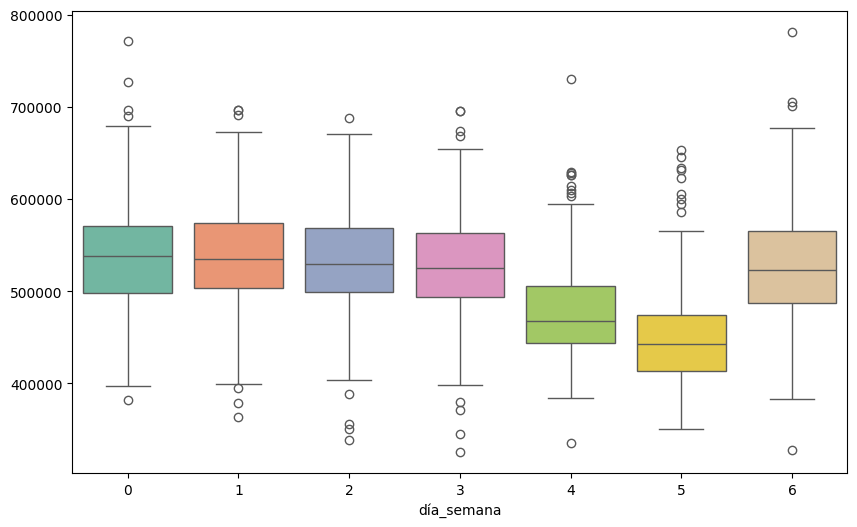

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_juntado, x="día_semana", y="Energía_asignada_en_Mercado_SPOT_Diario_España",palette='Set2')
plt.title("")
plt.ylabel("")

plt.show()

**Se observa una más clara tendencia de que la energía asignada es menor los viernes y sabado**

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\2346398443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_juntado, x="mes", y="Energía_asignada_en_Mercado_SPOT_Diario_España",palette='Set2')


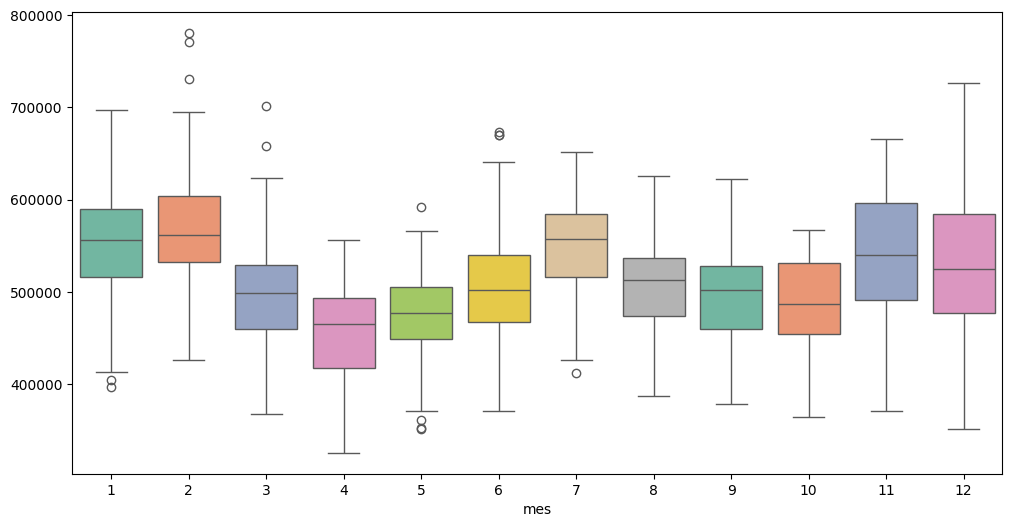

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_juntado, x="mes", y="Energía_asignada_en_Mercado_SPOT_Diario_España",palette='Set2')
plt.title("")
plt.ylabel("")

plt.show()

**Se observa de manera más clara que la energía asignada es menor en primavera y otoño, siendo mayor en invierno y verano. Es decir tiene una tendencia estacional**

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\2097051406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energia_espana['year_month'] = df_energia_espana['datetime'].dt.to_period('M')
C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\2097051406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energia_francia['year_month'] = df_energia_francia['datetime'].dt.to_period('M')


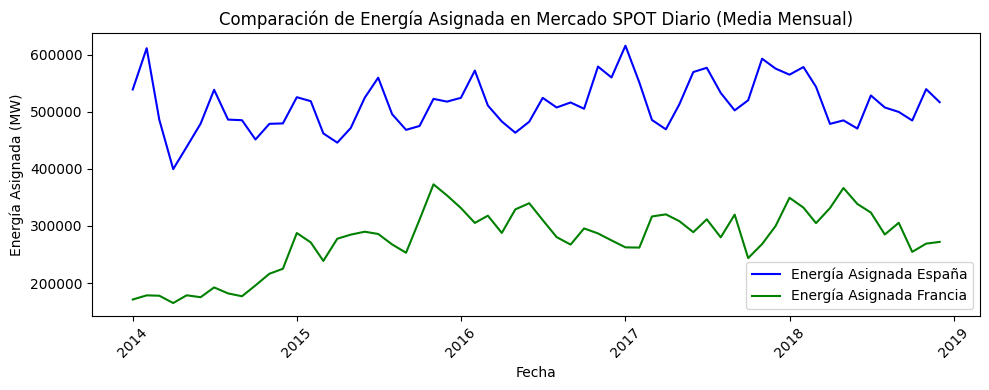

In [51]:
df_energia_espana = df[df['name'] == "Energía asignada en Mercado SPOT Diario España"]
df_energia_francia = df[df['name'] == "Energía asignada en Mercado SPOT Diario Francia"]

df_energia_espana['year_month'] = df_energia_espana['datetime'].dt.to_period('M')
df_energia_francia['year_month'] = df_energia_francia['datetime'].dt.to_period('M')

df_energia_espana_monthly = df_energia_espana.groupby('year_month')['value'].mean().reset_index()
df_energia_francia_monthly = df_energia_francia.groupby('year_month')['value'].mean().reset_index()

df_merged_energia = df_energia_espana_monthly.merge(
    df_energia_francia_monthly, on='year_month', suffixes=('_espana', '_francia'))

df_merged_energia.columns = ['year_month', 'energia_espana', 'energia_francia']

df_merged_energia['year_month'] = df_merged_energia['year_month'].dt.to_timestamp()

plt.figure(figsize=(10, 4))
plt.plot(df_merged_energia['year_month'], df_merged_energia['energia_espana'], label="Energía Asignada España", color='blue')
plt.plot(df_merged_energia['year_month'], df_merged_energia['energia_francia'], label="Energía Asignada Francia", color='green')
plt.xlabel("Fecha")
plt.ylabel("Energía Asignada (MW)")
plt.title("Comparación de Energía Asignada en Mercado SPOT Diario (Media Mensual)")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

#### Demanda Programada y la Deamanda Real

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\556327744.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df_demanda.resample('M').mean().reset_index()


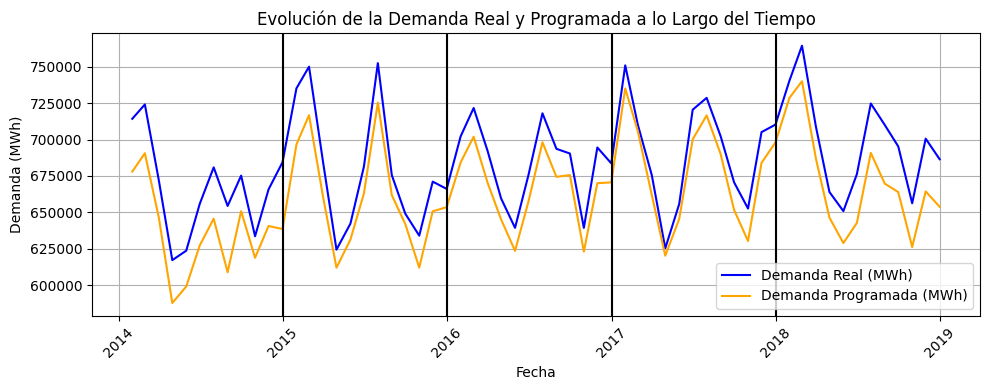

In [52]:
# DF variables precio y tipos de energía
demanda_columns = [col for col in df_juntado.columns if 'Demanda' in col or 'datetime' in col ]  
df_demanda = df_juntado[demanda_columns]

df_demanda.set_index('datetime', inplace=True)

df_mensual = df_demanda.resample('M').mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(df_mensual['datetime'], df_mensual['Demanda_real_MWh'], label='Demanda Real (MWh)', color='blue')
plt.plot(df_mensual['datetime'], df_mensual['Demanda_programada_PBF_total'], label='Demanda Programada (MWh)', color='orange')

for year in pd.date_range(start=df_mensual['datetime'].min(), end=df_mensual['datetime'].max(), freq='YS'):
    plt.axvline(x=year, color='black', linestyle='-', linewidth=1.5)
    
plt.title('Evolución de la Demanda Real y Programada a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Demanda (MWh)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\1642928689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variable['value']=df_variable['value'] *24
C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\1642928689.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variable['media'] = media_variable
C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\1642928689.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

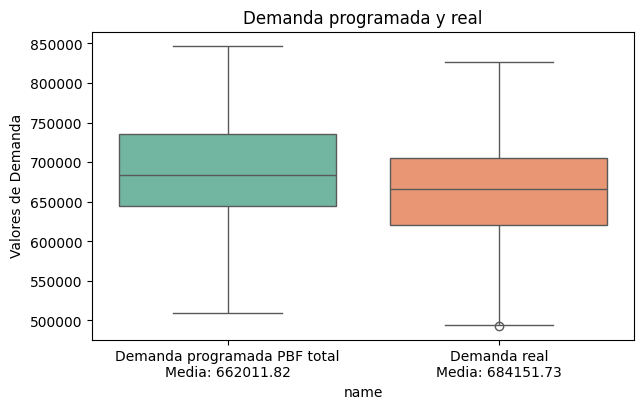

In [53]:
variables_demanda = [variable for variable in df['name'].unique() if variable.startswith("Demanda")]

df_combined = pd.DataFrame()

for variable in variables_demanda:
    
    df_variable = df[df['name'] == variable]
    if variable=='Demanda real':
        df_variable['value']=df_variable['value'] *24
    media_variable = df_variable['value'].dropna().mean()

    df_variable['media'] = media_variable
    df_combined = pd.concat([df_combined, df_variable], ignore_index=True)

plt.figure(figsize=(7, 4))
sns.boxplot(x='name', y='value', hue='name', data=df_combined, palette='Set2', legend=False)

medias = df_combined.groupby('name')['media'].first().to_dict()
plt.xticks(ticks=range(len(medias)), 
           labels=[f"{name}\nMedia: {media:.2f}" for name, media in medias.items()])

plt.title("Demanda programada y real")
plt.xticks(rotation=0)
plt.ylabel("Valores de Demanda")

plt.show()

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\793426375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_juntado, x="día_semana", y="Demanda_programada_PBF_total",palette='Set2')


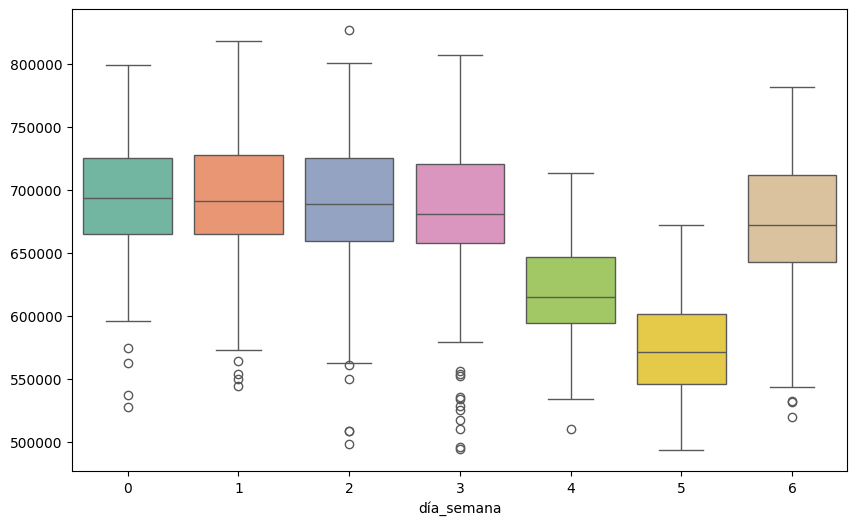

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_juntado, x="día_semana", y="Demanda_programada_PBF_total",palette='Set2')
plt.title("")
plt.ylabel("")

plt.show()

**Se ve claramente que el viernes y sabado son los días de menor demanda, al igual que con la energía asignada.**

C:\Users\Portatil\AppData\Local\Temp\ipykernel_18564\3570792990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_juntado, x="mes", y="Demanda_programada_PBF_total",palette='Set2')


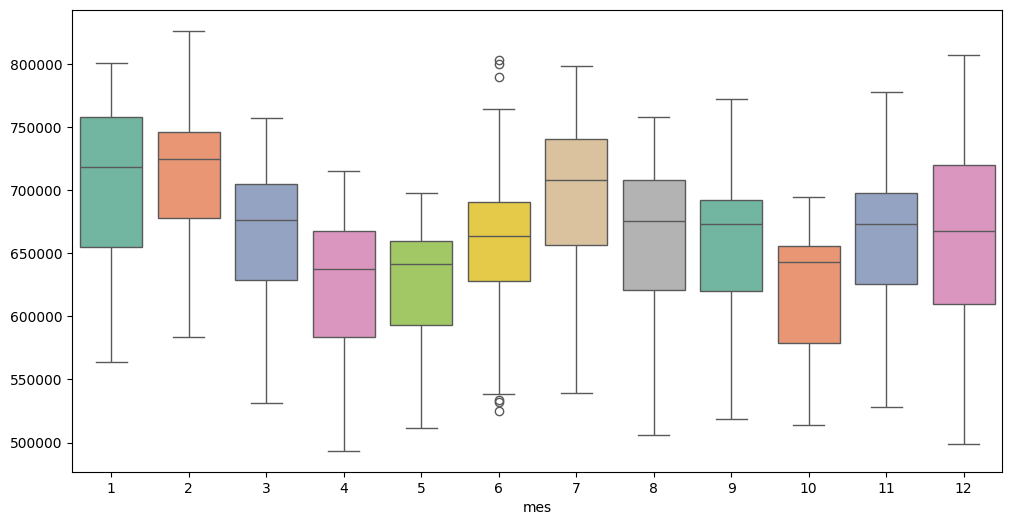

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_juntado, x="mes", y="Demanda_programada_PBF_total",palette='Set2')
plt.title("")
plt.ylabel("")

plt.show()

**Al igual que con la enería asignada, se observa una tendencia estacional**

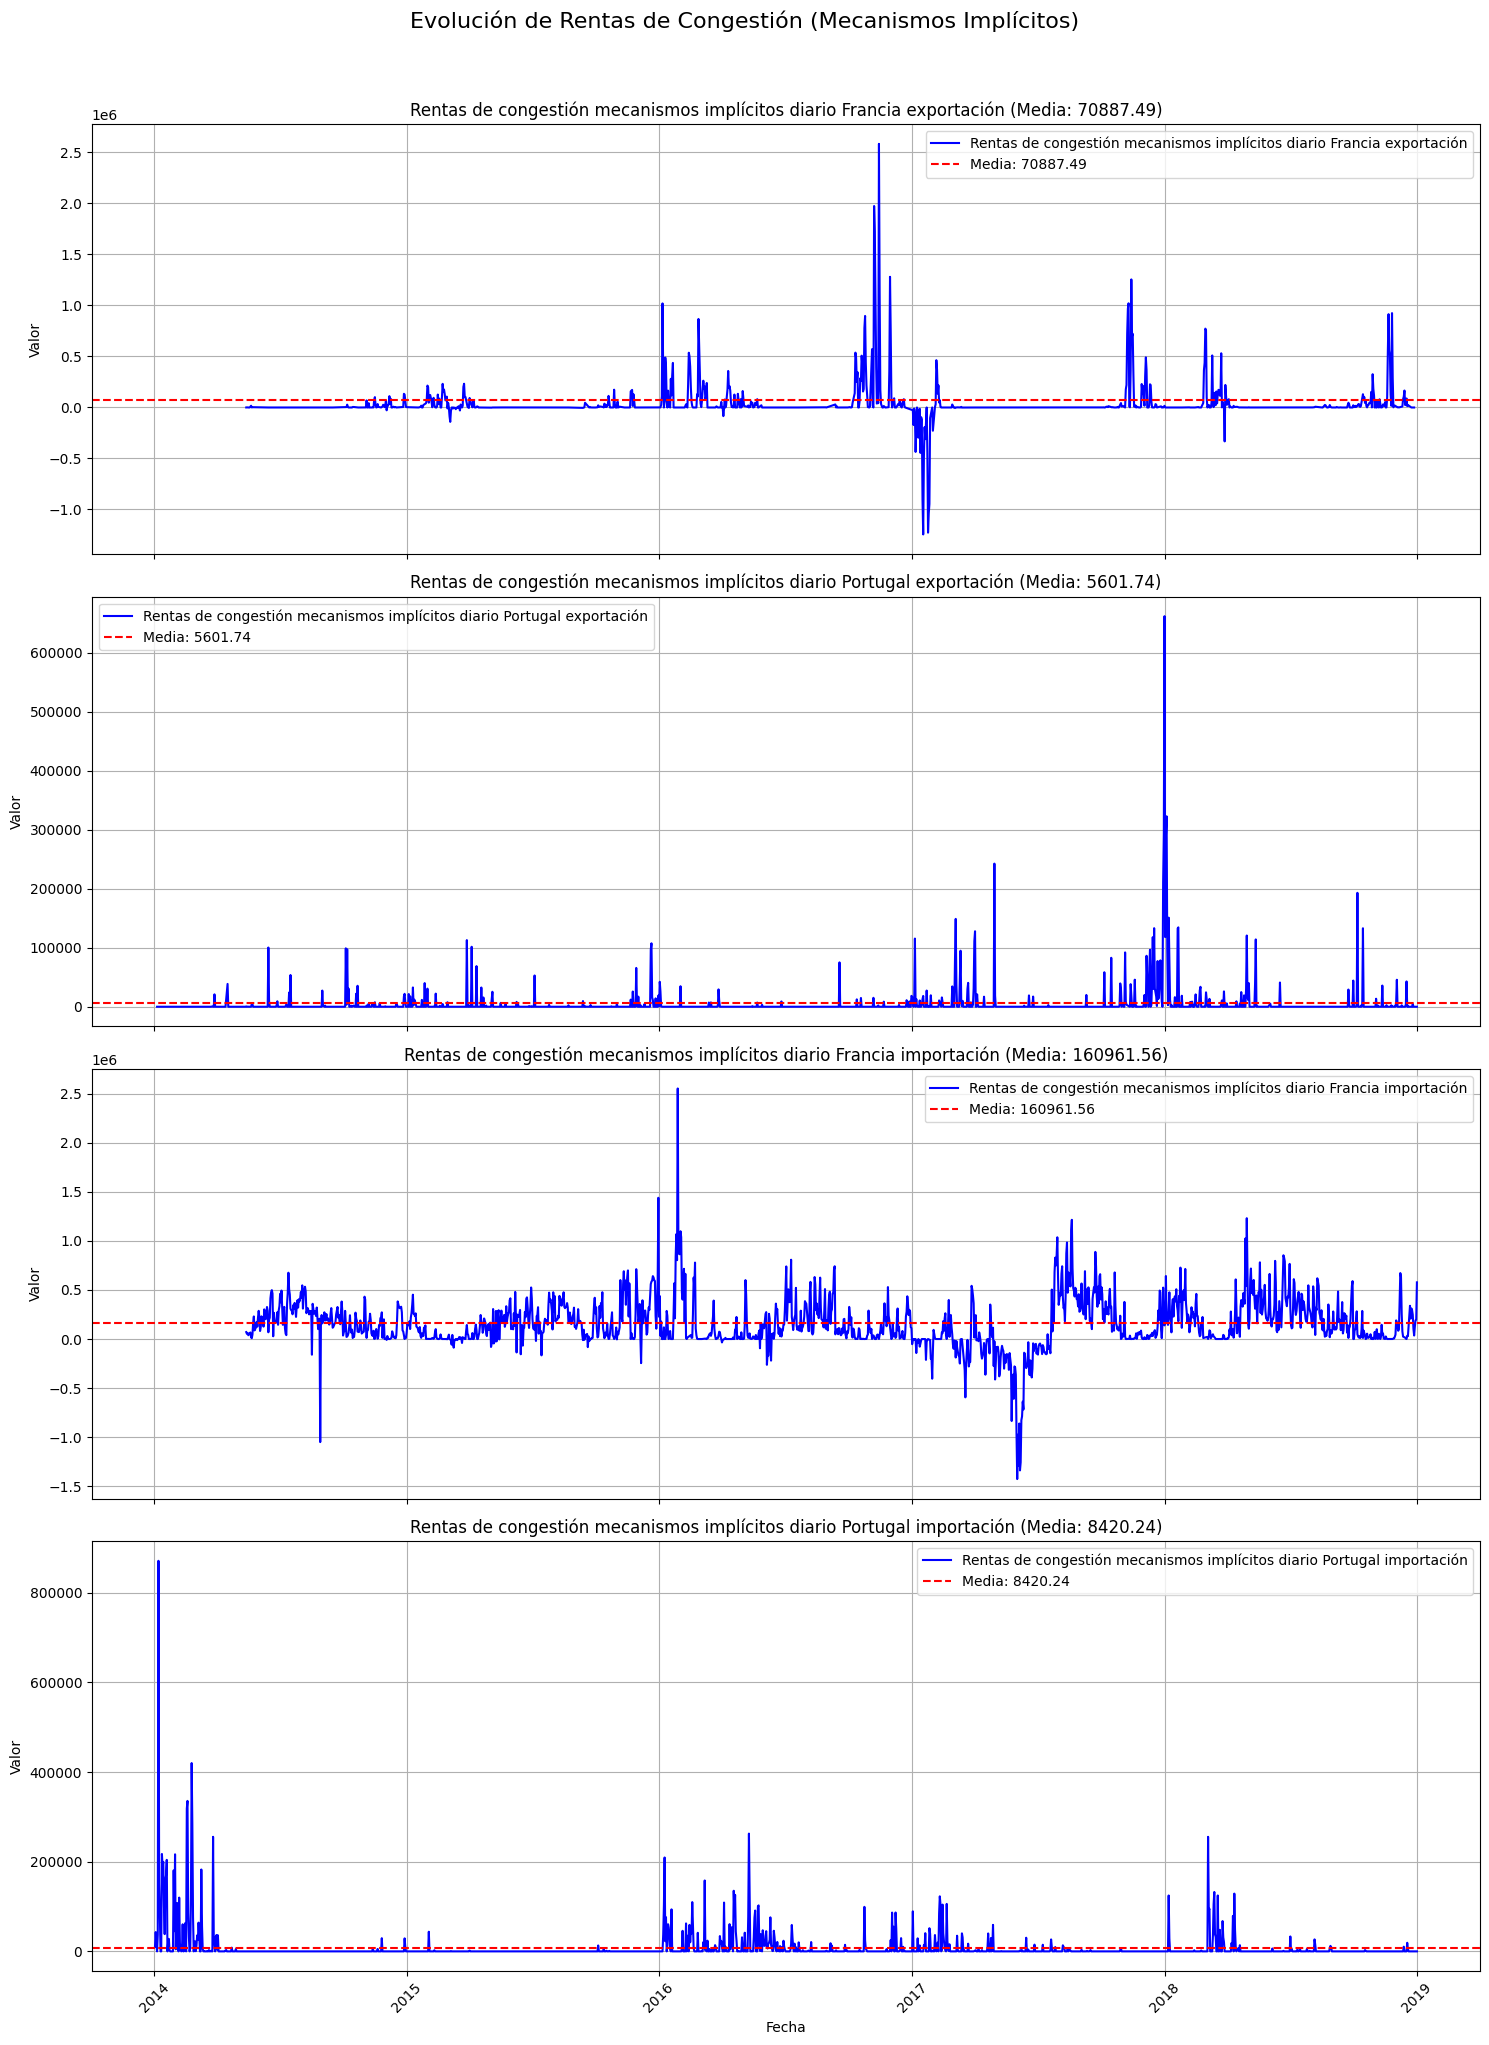

In [56]:
variables = [variable for variable in df['name'].unique() if variable.startswith("Rentas")]

fig, axs = plt.subplots(len(variables), 1, figsize=(15, len(variables) * 5), sharex=True)

fig.suptitle("Evolución de Rentas de Congestión (Mecanismos Implícitos)", fontsize=16, y=1.02)

for i, variable in enumerate(variables):
    df_variable = df[df['name'] == variable]

    media_variable = df_variable['value'].dropna().mean()

    axs[i].plot(df_variable['datetime'], df_variable['value'], label=variable, color='blue')
    axs[i].axhline(y=media_variable, color='red', linestyle='--', label=f'Media: {media_variable:.2f}')
    axs[i].set_title(f"{variable} (Media: {media_variable:.2f})")
    axs[i].set_ylabel("Valor")
    axs[i].legend()
    axs[i].grid()

plt.xlabel("Fecha")
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()